In [49]:
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

In [7]:
#load the dataset
data=pd.read_csv('/content/drive/MyDrive/Content/Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [8]:
#Size of the dataframe
data.shape

(232074, 3)

In [9]:
#Rename Unamed column

data = data.rename(columns={'Unnamed: 0':'ID'})

In [10]:
#Unique values in class
print(data['class'].unique())

['suicide' 'non-suicide']


In [11]:
# Create binary for class column
data['class_binary'] = data['class'].map({'suicide': 1, 'non-suicide': 0})

In [12]:
data.dropna()

,ID,text,class,class_binary
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1
1,3,Am I weird I don't get affected by compliments...,non-suicide,0
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0
3,8,i need helpjust help me im crying so hard,suicide,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1
...,...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide,0
232070,348106,You how you can tell i have so many friends an...,non-suicide,0
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,0
232072,348108,The usual stuff you find hereI'm not posting t...,suicide,1


# Text Preprocessing

In [13]:

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    #remove urls
    text = re.sub(r'http\S+', '', text)
    #remove number and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    #remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

data['processed_text'] = data['text'].apply(preprocess_text)



data.head()

,ID,text,class,class_binary,processed_text
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,1,ex wife threatening suiciderecently left wife ...
1,3,Am I weird I don't get affected by compliments...,non-suicide,0,weird dont get affected compliments coming som...
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,0,finally almost never hear bad year ever swear ...
3,8,i need helpjust help me im crying so hard,suicide,1,need helpjust help im crying hard
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1,im losthello name adam ive struggling years im...


# Feature Extraction

In [14]:
vectorizer = TfidfVectorizer(max_features = 5000) #Limiting to 5000 most frequent words for simplicity
X = vectorizer.fit_transform(data['processed_text'])
y = data['class']
z = data['class_binary'] #z_train, z_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build Model and Evaluate

In [15]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 non-suicide       0.94      0.86      0.89     22984
     suicide       0.87      0.94      0.90     23431

    accuracy                           0.90     46415
   macro avg       0.90      0.90      0.90     46415
weighted avg       0.90      0.90      0.90     46415



# Visualizations

## Confusion Matrix

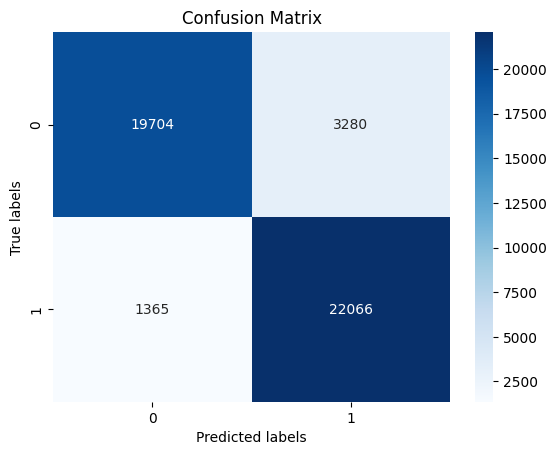

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Class Distribution Bar Chart

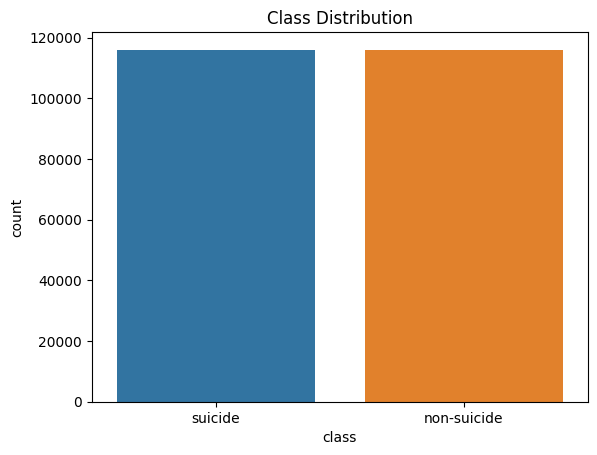

In [17]:
sns.countplot(data=data, x='class')
plt.title('Class Distribution')
plt.show()

## Word Cloud

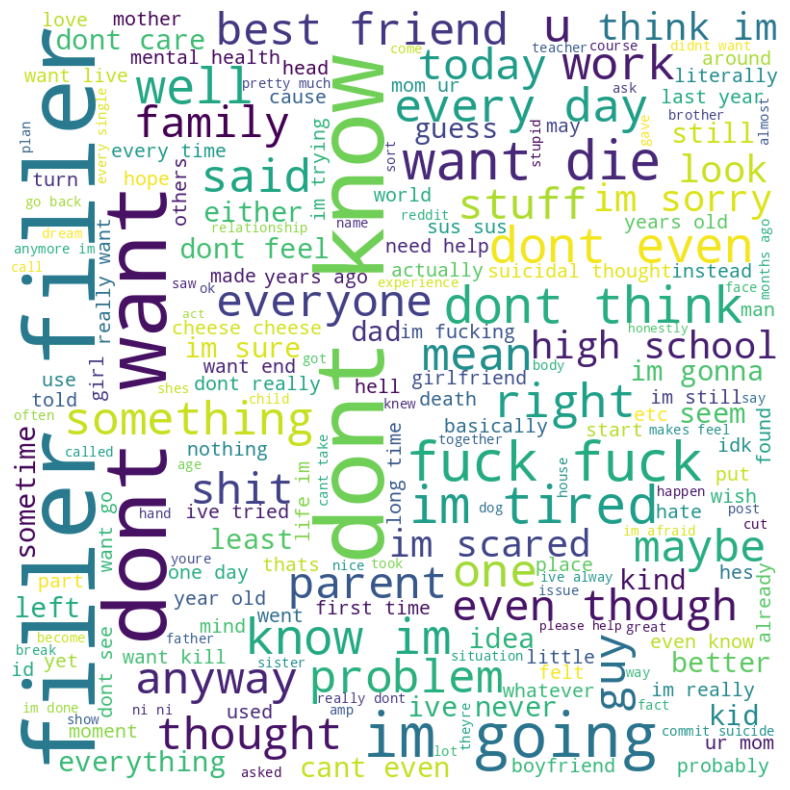

In [18]:
from wordcloud import WordCloud

all_text = ' '.join(data['processed_text'])
wordcloud = WordCloud(background_color='white', width=800, height=800).generate(all_text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Extraction for Precision-Recall

In [19]:
vectorizer = TfidfVectorizer(max_features = 5000) #Limiting to 5000 most frequent words for simplicity
X = vectorizer.fit_transform(data['processed_text'])
y = data['class_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Precision-Recall Curve

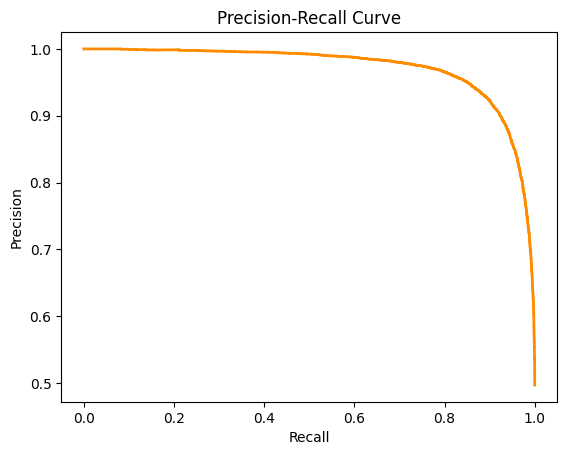

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Feature Extraction for Roc Curve AUC

### Roc Curve and AUC is a little stubborn on any platform
### There is a need to try different techniques

### This is extremely slow and costly.

In [23]:

####clf = RandomForestClassifier()
####clf.fit(X_train, y_train)

# ROC Curve and AUC
####fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
####roc_auc = auc(fpr, tpr)

### With a bit of research I found chunking, joblib

In [45]:

from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from joblib import Parallel, delayed

In [43]:
chunk_size = 1000

# Calculate the number of chunks required
num_chunks = len(data) // chunk_size + 1

# Create a list of DataFrame chunks
data_chunks = [data[i * chunk_size:(i + 1) * chunk_size] for i in range(num_chunks)]

def calculate_roc_chunk(chunk):
    # Extract text and labels
    text_chunk = chunk['text']
    labels_chunk = chunk['class_binary'].values  # Assuming 'class' column is binary-encoded (0 or 1)

    # Vectorize the text data
    X_chunk =  vectorizer.fit_transform(text_chunk)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, labels_chunk, test_size=0.2, random_state=42)

    # Train a binary classification model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve for this chunk
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    return y_test, y_prob  # Return y_test and y_prob

# Parallelize the ROC curve calculation for each chunk
roc_curves = Parallel(n_jobs=-1)(
    delayed(calculate_roc_chunk)(chunk) for chunk in data_chunks
)

# Now, 'roc_curves' is a list of (y_test, y_prob) pairs for each chunk

# Calculate ROC AUC for each chunk
roc_aucs = [roc_auc_score(y_test, y_prob) for y_test, y_prob in roc_curves]

# Calculate overall ROC AUC by aggregating individual AUCs
overall_roc_auc = sum(roc_aucs) / len(roc_aucs)

print(f"Overall ROC AUC: {overall_roc_auc}")

# Calculate overall ROC AUC by aggregating individual AUCs
overall_roc_auc = sum(roc_aucs) / len(roc_aucs)

print(f"Overall ROC AUC: {overall_roc_auc}")

Overall ROC AUC: 0.9360912841184723
Overall ROC AUC: 0.9360912841184723


Execution Time:  96.48 seconds


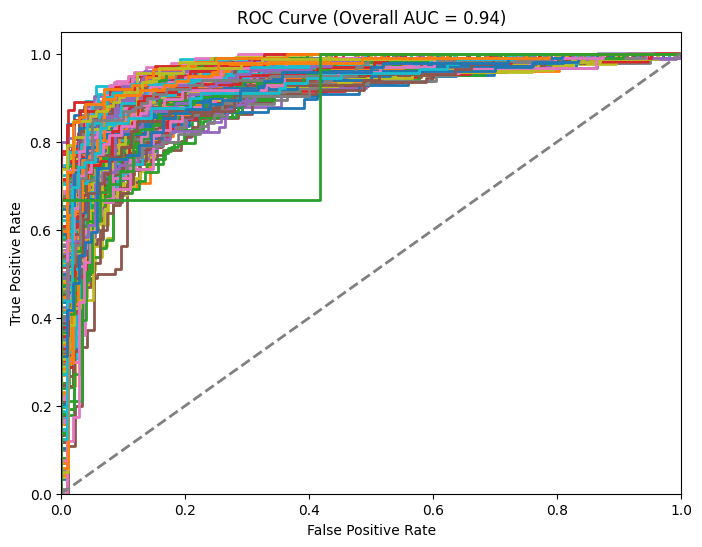

In [50]:
def calculate_roc_chunk(chunk):
    # Extract text and labels
    text_chunk = chunk['text']
    labels_chunk = chunk['class_binary'].values

    # Vectorize the text data (
    X_chunk =  vectorizer.fit_transform(text_chunk)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, labels_chunk, test_size=0.2, random_state=42)

    # Train a binary classification model (e.g., Logistic Regression)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve for this chunk
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    return fpr, tpr  # Return fpr and tpr

# Parallelize the ROC curve calculation for each chunk
start_time = time.time()
roc_curves = Parallel(n_jobs=-1)(
    delayed(calculate_roc_chunk)(chunk) for chunk in data_chunks
)
end_time = time.time()
execution_time = end_time-start_time

print(f"Execution Time: {execution_time: .2f} seconds")

# Now, 'roc_curves' is a list of (fpr, tpr) pairs for each chunk

# Create an empty list to store AUC values
roc_aucs = []

# Initialize a figure for the ROC curve plot
plt.figure(figsize=(8, 6))

# Plot ROC curves for each chunk and calculate ROC AUC values
for fpr, tpr in roc_curves:
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2)

# Calculate overall ROC AUC by aggregating individual AUCs
overall_roc_auc = np.mean(roc_aucs)

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (Overall AUC = {overall_roc_auc:.2f})')
#plt.legend([f'Chunk {i+1}' for i in range(len(roc_curves))] + ['Random'], loc='lower right')
plt.show()

### Multiprocessing

In [48]:
from multiprocessing import pool

Execution Time:  31.33 seconds


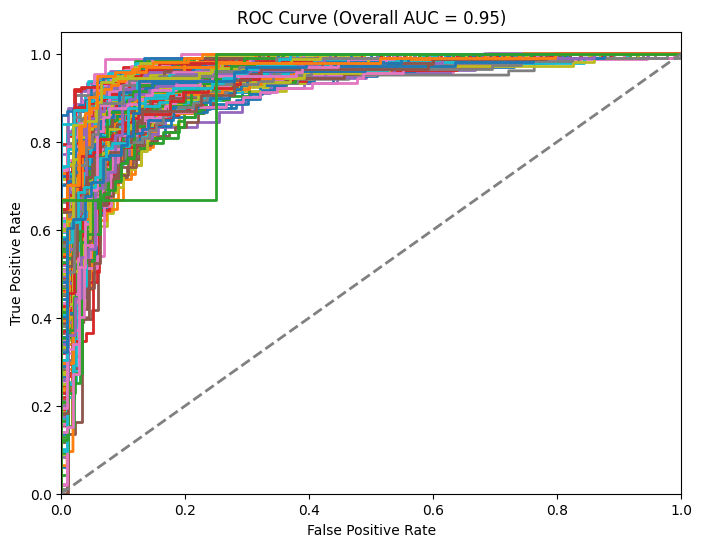

In [51]:

# Define a function to calculate ROC curves for a chunk of data
def calculate_roc_chunk(chunk):
    # Extract text and labels
    text_chunk = chunk['text']
    labels_chunk = chunk['class_binary'].values

    # Vectorize the text data
    X_chunk = vectorizer.transform(text_chunk)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_chunk, labels_chunk, test_size=0.2, random_state=42)

    # Train a binary classification model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve for this chunk
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    return fpr, tpr  # Return fpr and tpr

# Create a Pool of worker processes
num_processes = 4
start_time = time.time()
with Pool(num_processes) as pool:
    # Parallelize the ROC curve calculation for each chunk
    roc_curves = pool.map(calculate_roc_chunk, data_chunks)

end_time = time.time()
execution_time = end_time-start_time

print(f"Execution Time: {execution_time: .2f} seconds")



# Create an empty list to store AUC values
roc_aucs = []

# Initialize a figure for the ROC curve plot
plt.figure(figsize=(8, 6))

# Plot ROC curves for each chunk and calculate ROC AUC values
for fpr, tpr in roc_curves:
    roc_auc = auc(fpr, tpr)  # Calculate AUC for each chunk
    roc_aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2)

# Calculate overall ROC AUC by aggregating individual AUCs
overall_roc_auc = np.mean(roc_aucs)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (Overall AUC = {overall_roc_auc:.2f})')
#plt.legend([f'Chunk {i+1}' for i in range(len(roc_curves))] + ['Random'], loc='lower right')
plt.show()